In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()
iris_df = pd.DataFrame(data.data, columns=data.feature_names)
iris_df['Species'] = data.target

In [ ]:
species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['Species'] = iris_df['Species'].map(species_mapping)

In [ ]:
print(iris_df.head())
print(iris_df.info())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float

In [ ]:
print("Missing values:")
print(iris_df.isnull().sum())

Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64


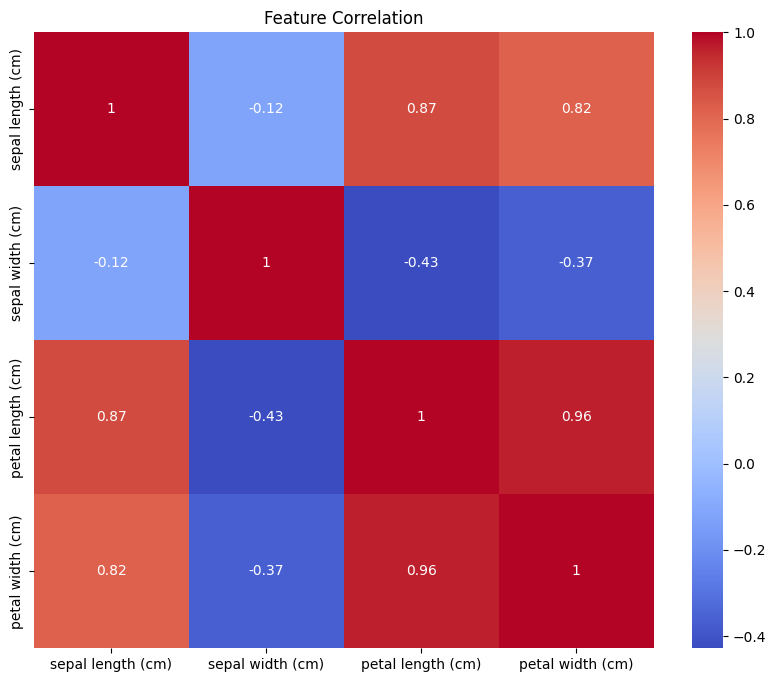

In [ ]:
plt.figure(figsize=(10, 8))
numerical_features = iris_df.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [ ]:
X = iris_df.drop('Species', axis=1)
y = iris_df['Species']

In [ ]:
y = pd.factorize(y)[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

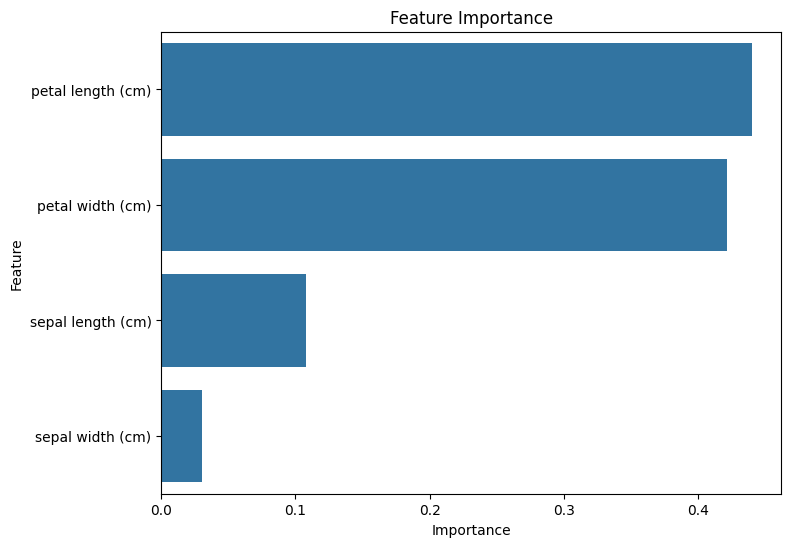

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()